# Bank Churn Classification

In [26]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [28]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [30]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [31]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [33]:
test.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


In [34]:
train = train.drop(['id', 'CustomerId', 'Geography', 'Surname'], axis=1)

submission = test['id']
test = test.drop(['id', 'CustomerId', 'Geography', 'Surname'], axis=1)

X_train = train.drop(['Exited'], axis=1)
y_train = train[['Exited']]

In [35]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [36]:
y_train.head()

,Exited
0,0
1,0
2,0
3,0
4,0


## Exploratory Data Analysis

#### Exploring CreditScore 

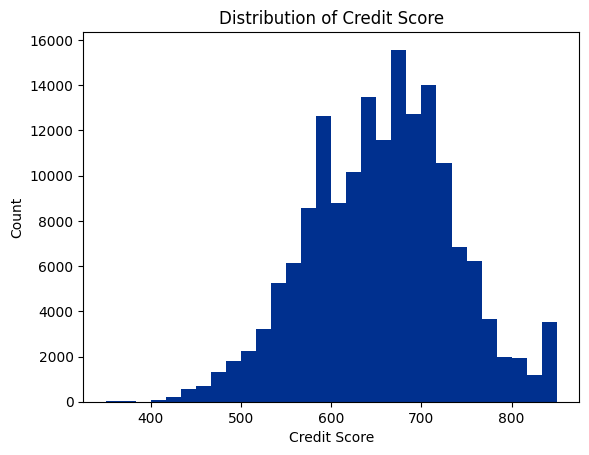

In [37]:
plt.hist(x=X_train['CreditScore'], bins=30, color='#00308F')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

#### Exploring Age

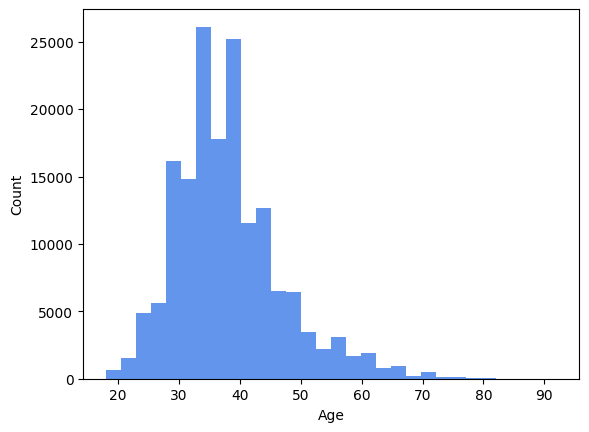

In [38]:
plt.hist(x=X_train['Age'], bins=30, color='#6495ED')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Exploring Tenure

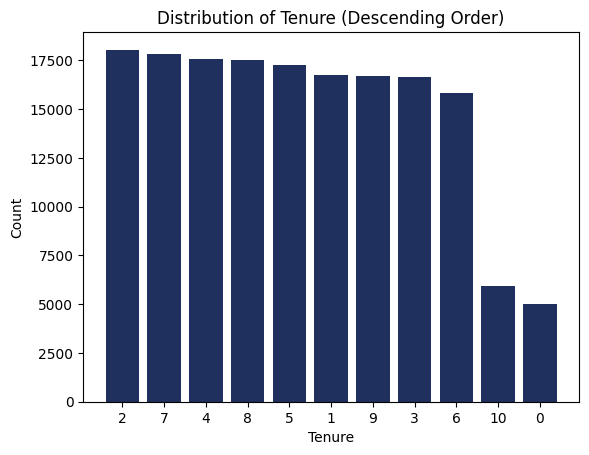

In [39]:
tenure_value_counts = X_train['Tenure'].value_counts()
tenure_values_counts_sorted = tenure_value_counts.sort_values(ascending=False)  # Sort the values in descending order of counts

tenure_index = tenure_values_counts_sorted.index
tenure_values = tenure_values_counts_sorted.values

plt.bar(x=range(len(tenure_index)), height=tenure_values, tick_label=tenure_index, color='#1F305E')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Tenure (Descending Order)')
plt.show()

#### Exploring Balance

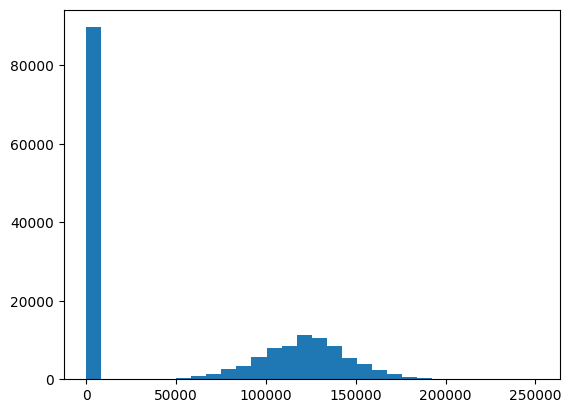

In [40]:
plt.hist(x=X_train['Balance'], bins=30)
plt.show()

#### Exploring NumOfProducts

In [ ]:
num_of_products = X_train['NumOfProducts'].value_counts()
num_of_products = num_of_products.sort_values(ascending=False)
num_of_products

## Data Preprocessing

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [42]:
class BankChurnPipe():
    def __init__(self, x):
        self.x = x
        self.num_features = self.x.select_dtypes(('int64', 'float64')).columns
        self.cat_features = self.x.select_dtypes('object').columns
        self.num_pipeline = make_pipeline(StandardScaler())
        self.cat_pipeline = make_pipeline(OneHotEncoder())

    def transform(self):

        pipe = ColumnTransformer([
            ('num', self.num_pipeline, self.num_features),
            ('cat', self.cat_pipeline, self.cat_features)
        ])

        transformed_data = pipe.fit_transform(self.x)
        return transformed_data
        

In [43]:
X_train = BankChurnPipe(X_train).transform()
test = BankChurnPipe(test).transform()

In [44]:
X_train.shape

(165034, 10)

In [45]:
test.shape

(110023, 10)

## Model Creation and Feature Selection

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [50]:
rfc_params = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'criterion' : ['gini', 'log_loss', 'entropy']
}


rfc_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rfc_params)
rfc_grid.fit(X_train, y_train)

C:\Users\Tyron\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Tyron\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Tyron\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Tyron\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed whe

In [ ]:
print(f'RandomForestClassifier Best Score: {rfc_grid.best_score_}')
print(f'RandomForestClassifier Best Params: {rfc_grid.best_params_}')

## Model Evaluation

## Conclusion